<a href="https://colab.research.google.com/github/cgeorgeandersen/coffee_analysis/blob/main/Coffee_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-coffee-health-dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/kaggle/input/global-coffee-health-dataset/synthetic_coffee_health_10000.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
coffee_by_country = df.groupby('Country')['Coffee_Intake'].mean().sort_values(ascending=False)
coffee_by_country

,Coffee_Intake
Country,
Spain,2.599794
Norway,2.588145
UK,2.582274
China,2.574664
USA,2.563393
Brazil,2.547588
Australia,2.544266
Switzerland,2.540400
Japan,2.533902


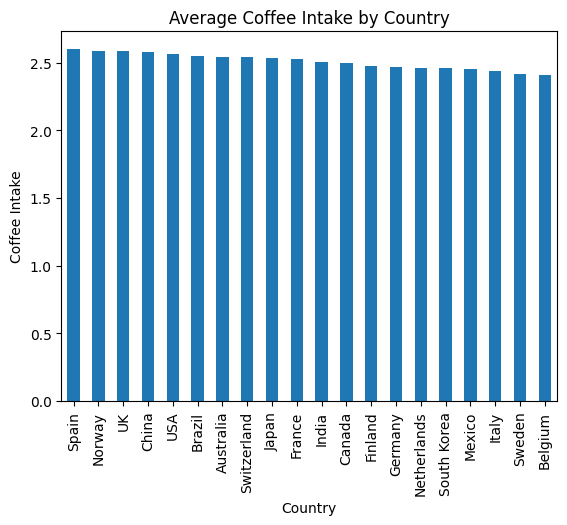

In [4]:
coffee_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Coffee Intake')
plt.title('Average Coffee Intake by Country')
plt.show()

In [5]:
bmi_by_country = df.groupby('Country')['BMI'].mean().sort_values(ascending=False)
bmi_by_country

,BMI
Country,
Belgium,24.233602
India,24.187214
Canada,24.169797
Netherlands,24.126316
UK,24.082081
Mexico,24.074327
Switzerland,24.057600
Japan,24.057569
Australia,24.049698


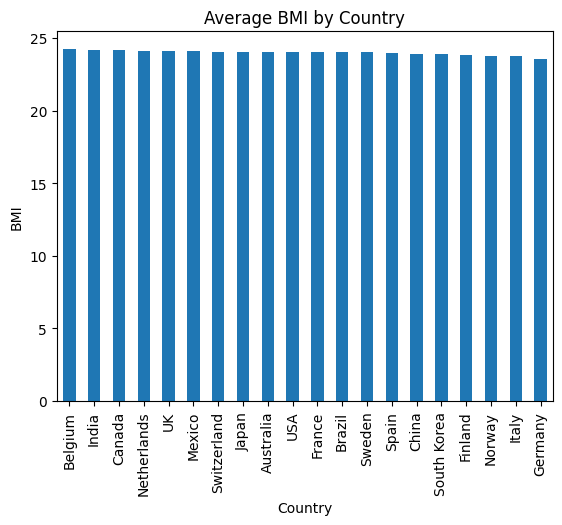

In [6]:
bmi_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('BMI')
plt.title('Average BMI by Country')
plt.show()

In [7]:
forty_yo = df[df['Age'] == 40]
forty_yo

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
133,134,40,Male,USA,0.0,0.0,5.9,Fair,21.1,50,Medium,1.6,Mild,Office,0,0
157,158,40,Male,Germany,4.3,404.7,6.9,Good,26.6,58,Low,13.2,NaN,Student,0,0
183,184,40,Male,Mexico,2.2,207.4,8.4,Excellent,22.3,72,Low,6.2,NaN,Healthcare,0,0
186,187,40,Male,China,1.7,162.3,6.5,Good,27.2,60,Low,13.3,NaN,Office,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,9737,40,Male,Canada,7.0,668.1,4.5,Poor,27.7,67,High,4.5,Mild,Student,0,1
9861,9862,40,Female,USA,1.8,171.9,7.2,Good,26.6,66,Low,2.4,NaN,Student,0,0
9883,9884,40,Male,Canada,1.3,123.3,7.3,Good,20.2,80,Low,3.4,NaN,Office,0,0
9959,9960,40,Male,China,3.2,305.1,5.1,Fair,25.5,64,Medium,2.8,Mild,Service,1,1


In [8]:
quality_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

In [9]:
forty_yo['Sleep_Quality_Score'] = forty_yo['Sleep_Quality'].map(quality_map)

forty_sleep = (
    forty_yo.groupby('Country')['Sleep_Quality_Score']
    .mean()
    .sort_values(ascending=False)
)

forty_sleep

/tmp/ipython-input-1637018741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forty_yo['Sleep_Quality_Score'] = forty_yo['Sleep_Quality'].map(quality_map)


,Sleep_Quality_Score
Country,
Netherlands,3.166667
Finland,2.941176
Italy,2.928571
Canada,2.909091
Sweden,2.882353
South Korea,2.882353
Belgium,2.800000
France,2.800000
China,2.800000


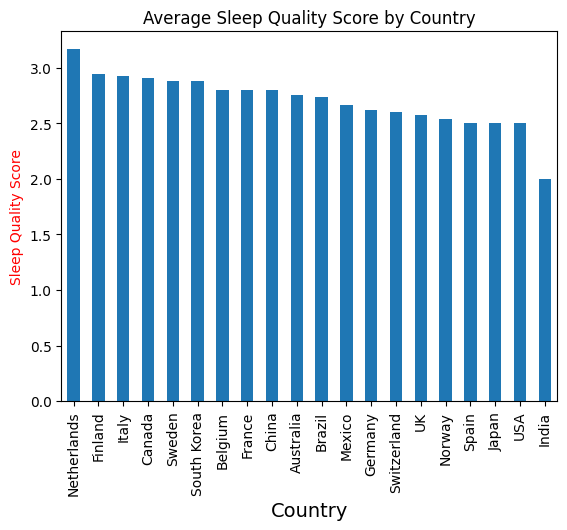

In [10]:
forty_sleep.plot( kind = 'bar')
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Sleep Quality Score', color = 'red')
plt.title('Average Sleep Quality Score by Country')
plt.show()


In [11]:
occupation_stats = (
    df.groupby('Occupation')['Coffee_Intake']
    .agg(['mean','median','std','count'])
    .sort_values('mean', ascending=False)
)
print(occupation_stats.head())


                mean  median       std  count
Occupation                                   
Healthcare  2.539460     2.5  1.482235   1964
Student     2.512957     2.5  1.463058   1968
Service     2.512110     2.5  1.408407   1957
Other       2.500785     2.5  1.468594   2038
Office      2.482634     2.5  1.428839   2073


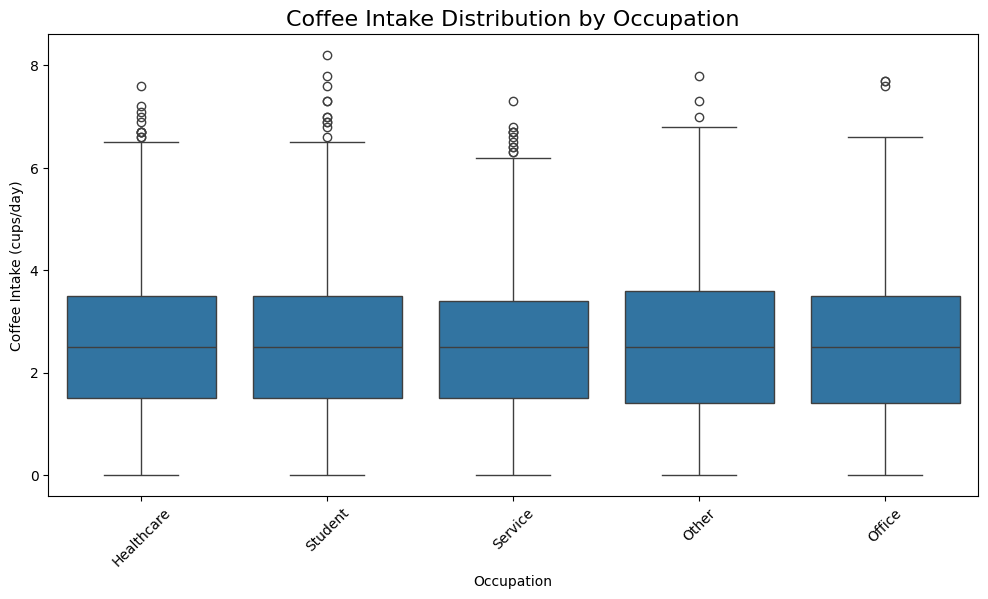

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='Occupation', y='Coffee_Intake', data=df, order=df.groupby('Occupation')['Coffee_Intake'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Coffee Intake Distribution by Occupation', fontsize=16)
plt.ylabel('Coffee Intake (cups/day)')
plt.xlabel('Occupation')
plt.show()


In [13]:
from scipy.stats import f_oneway

groups = [vals['Coffee_Intake'].values for _, vals in df.groupby('Stress_Level')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F={f_stat:.2f}, p={p_val:.3g}")


ANOVA F=117.09, p=5.45e-51


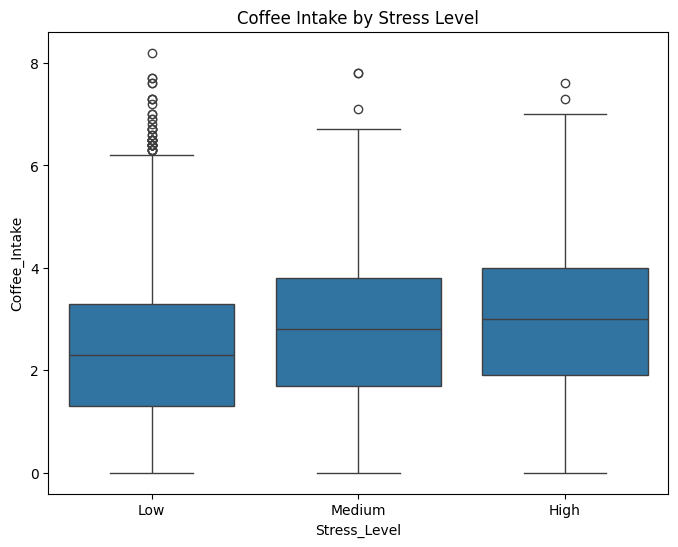

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Stress_Level', y='Coffee_Intake', data=df,
            order=df.groupby('Stress_Level')['Coffee_Intake'].mean().sort_values().index)
plt.title("Coffee Intake by Stress Level")
plt.show()



In [15]:
stress_map = {'Low':1, 'Medium':2, 'High':3}
df['Stress_Code'] = df['Stress_Level'].map(stress_map)


In [16]:
X = df['Stress_Code'].values.reshape(-1,1)  # 2D array for sklearn
y = df['Coffee_Intake'].values


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 2.0476191440415374
Slope: 0.3303828055814933


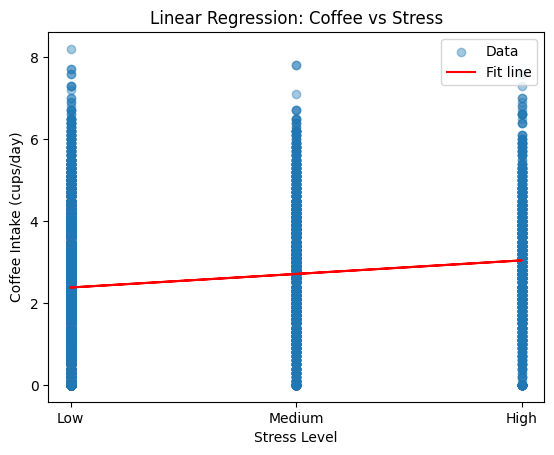

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.4, label='Data')
plt.plot(X, model.predict(X), color='red', label='Fit line')
plt.xticks([1,2,3], ['Low','Medium','High'])
plt.xlabel("Stress Level")
plt.ylabel("Coffee Intake (cups/day)")
plt.title("Linear Regression: Coffee vs Stress")
plt.legend()
plt.show()


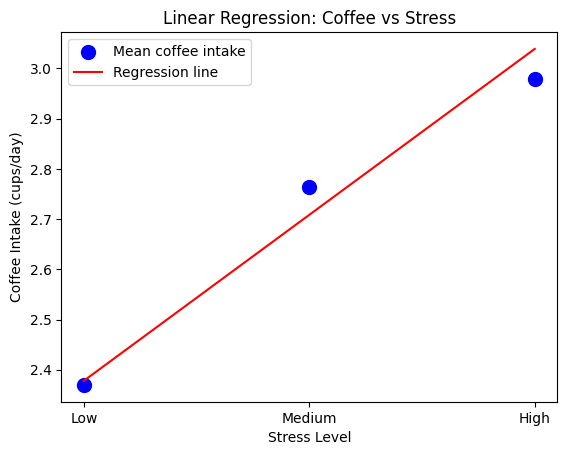

In [19]:
# Regression equation
intercept = model.intercept_
slope = model.coef_[0]

# Compute predicted values for just [1, 2, 3]
x_vals = np.array([1, 2, 3])
y_pred = intercept + slope * x_vals

plt.scatter(x_vals, df.groupby('Stress_Code')['Coffee_Intake'].mean(),
            s=100, color='blue', label='Mean coffee intake')
plt.plot(x_vals, y_pred, color='red', label='Regression line')

plt.xticks([1,2,3], ['Low','Medium','High'])
plt.xlabel("Stress Level")
plt.ylabel("Coffee Intake (cups/day)")
plt.title("Linear Regression: Coffee vs Stress")
plt.legend()
plt.show()

